# Topic 37: Intro to Time Series

- xx/xx/2x
- onl01-dtsc-xt-xxxxxx

## Learning Objectives:

- Learn how to load in timeseries data into pandas
- Learn how to plot timeseries in pandas
- Learn how to resample at different time frequencies
- Learn about types of time series trends and how to remove them.
- Learn about seasonal decomposition

- Prepare a time series dataset to use for modeling next class

## Questions?

# Intro to Time Series

## References

- [Pandas Timeseries Documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)
- ['Timeseries Offset Aliases'](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases)
- [Anchored Offsets](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#anchored-offsets)


- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html

## Working with Time Series

In [12]:
# !pip install -U fsds 
# from fsds.imports import *
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import os,sys


## Time Series Tools from statsmodels
import statsmodels.tsa.api as tsa
import statsmodels

## Setting figures to timeseries-friendly
mpl.rcParams['figure.figsize'] = (12,6)

# import warnings
# warnings.filterwarnings('ignore')


print(f'Seaborn version = {sns.__version__}')
print(f'Statsmodels version = {statsmodels.__version__}')
print(f'Pandas version = {pd.__version__}')

Seaborn version = 0.11.0
Statsmodels version = 0.12.2
Pandas version = 1.1.3


### Creating a Time Series from a DataFrame

- https://www.baltimorepolice.org/crime-stats/open-data

- Want [Part 1 Crime](https://data.baltimorecity.gov/search?q=crime%20data):
    - https://data.baltimorecity.gov/datasets/3eeb0a2cbae94b3e8549a8193717a9e1_0/explore
    
- Downloaded csv and saved with pandas as .gz
```python 
df.to_csv('baltimore_crime_05-26-21.csv.gz',compression='gzip',index=False)
```

In [13]:
# file0 = 'baltimore_crime_2020.csv'
# df0 = pd.read_csv(file0,low_memory=False,usecols=range(12))#,
# df0

In [14]:
file = 'baltimore_crime_05-26-21.csv.gz'

keep_cols = ['CrimeDateTime','Description','Total_Incidents','Weapon',
             'Latitude','Longitude','District','Neighborhood']
df = pd.read_csv(file,low_memory=False,usecols=keep_cols)

df#[keep_cols]

,CrimeDateTime,Description,Weapon,District,Neighborhood,Latitude,Longitude,Total_Incidents
0,2021/05/22 14:01:44+00,HOMICIDE,FIREARM,NORTHWEST,HOWARD PARK,39.3324,-76.6985,1
1,2021/05/22 00:01:00+00,AGG. ASSAULT,HANDS,SOUTHWEST,ALLENDALE,39.2928,-76.6755,1
2,2021/05/22 18:11:00+00,HOMICIDE,FIREARM,WESTERN,EVERGREEN LAWN,39.2976,-76.6552,1
3,2021/05/22 19:44:00+00,COMMON ASSAULT,NaN,EASTERN,OLDTOWN,39.2948,-76.6064,1
4,2021/05/22 15:10:00+00,COMMON ASSAULT,NaN,EASTERN,GAY STREET,39.2995,-76.5957,1
...,...,...,...,...,...,...,...,...
336768,1975/06/01 00:00:00+00,RAPE,OTHER,SOUTHWEST,UPLANDS,39.2896,-76.6913,1
336769,1973/07/01 23:00:00+00,RAPE,OTHER,NORTHWEST,CENTRAL FOREST PARK,39.3262,-76.6872,1
336770,1970/06/15 00:01:00+00,RAPE,OTHER,WESTERN,MONDAWMIN,39.3100,-76.6571,1
336771,1969/07/20 21:00:00+00,RAPE,OTHER,NORTHERN,ROLAND PARK,39.3589,-76.6353,1


## Preparing Data for Time Series Visualization

- Index must be a `datetimeindex`

In [15]:
df.index 

RangeIndex(start=0, stop=336773, step=1)

In [16]:
df['CrimeDateTime'] = pd.to_datetime(df['CrimeDateTime'])
df.set_index('CrimeDateTime',inplace=True)

df.index

DatetimeIndex(['2021-05-22 14:01:44+00:00', '2021-05-22 00:01:00+00:00',
               '2021-05-22 18:11:00+00:00', '2021-05-22 19:44:00+00:00',
               '2021-05-22 15:10:00+00:00', '2021-05-22 13:00:00+00:00',
               '2021-05-22 13:00:00+00:00', '2021-05-22 11:40:00+00:00',
               '2021-05-22 12:00:00+00:00', '2021-05-22 22:00:00+00:00',
               ...
               '1979-01-01 00:01:00+00:00', '1978-01-01 00:00:00+00:00',
               '1978-01-01 10:30:00+00:00', '1978-01-01 00:00:00+00:00',
               '1977-05-01 00:01:00+00:00', '1975-06-01 00:00:00+00:00',
               '1973-07-01 23:00:00+00:00', '1970-06-15 00:01:00+00:00',
               '1969-07-20 21:00:00+00:00', '1963-10-30 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='CrimeDateTime', length=336773, freq=None)

In [18]:
df.head()

,Description,Weapon,District,Neighborhood,Latitude,Longitude,Total_Incidents
CrimeDateTime,,,,,,,
2021-05-22 14:01:44+00:00,HOMICIDE,FIREARM,NORTHWEST,HOWARD PARK,39.3324,-76.6985,1
2021-05-22 00:01:00+00:00,AGG. ASSAULT,HANDS,SOUTHWEST,ALLENDALE,39.2928,-76.6755,1
2021-05-22 18:11:00+00:00,HOMICIDE,FIREARM,WESTERN,EVERGREEN LAWN,39.2976,-76.6552,1
2021-05-22 19:44:00+00:00,COMMON ASSAULT,NaN,EASTERN,OLDTOWN,39.2948,-76.6064,1
2021-05-22 15:10:00+00:00,COMMON ASSAULT,NaN,EASTERN,GAY STREET,39.2995,-76.5957,1


In [21]:
## Inspect the value_counts for the different types of crimes
val_counts = df['Description'].value_counts(1).to_frame()
# display with an inline-barplot inside your df
val_counts.style.bar()

,Description
LARCENY,0.221755
COMMON ASSAULT,0.170593
BURGLARY,0.139367
LARCENY FROM AUTO,0.128345
AGG. ASSAULT,0.114255
AUTO THEFT,0.087602
ROBBERY - STREET,0.068462
ROBBERY - COMMERCIAL,0.017436
SHOOTING,0.014217
ROBBERY - RESIDENCE,0.010660


In [60]:
## Grab All Shootings
crime ="SHOOTING"
group_df = df.groupby('Description').get_group(crime)
group_df

,Description,Weapon,District,Neighborhood,Latitude,Longitude,Total_Incidents
CrimeDateTime,,,,,,,
2021-05-22 22:54:00+00:00,SHOOTING,FIREARM,WESTERN,SANDTOWN-WINCHESTER,39.3025,-76.6390,1
2021-05-21 15:48:00+00:00,SHOOTING,FIREARM,WESTERN,EVERGREEN LAWN,39.2970,-76.6550,1
2021-05-21 15:48:00+00:00,SHOOTING,FIREARM,WESTERN,EVERGREEN LAWN,39.2970,-76.6550,1
2021-05-20 19:42:00+00:00,SHOOTING,FIREARM,CENTRAL,UPTON,39.3043,-76.6357,1
2021-05-20 23:00:00+00:00,SHOOTING,FIREARM,NORTHWEST,TOWANDA-GRANTLEY,39.3361,-76.6659,1
...,...,...,...,...,...,...,...
2014-01-05 19:41:00+00:00,SHOOTING,FIREARM,CENTRAL,UPTON,39.3006,-76.6346,1
2014-01-05 16:30:00+00:00,SHOOTING,FIREARM,SOUTHWEST,ROGNEL HEIGHTS,39.2970,-76.6881,1
2014-01-03 14:32:00+00:00,SHOOTING,FIREARM,WESTERN,FRANKLIN SQUARE,39.2896,-76.6454,1


In [62]:
## 1 incident per row
group_df['Total_Incidents'].value_counts()

1    4788
Name: Total_Incidents, dtype: int64

In [61]:
## Lets get just Shootings in a new series
ts = df.groupby('Description').get_group(crime)['Total_Incidents'].rename(crime)
ts

CrimeDateTime
2021-05-22 22:54:00+00:00    1
2021-05-21 15:48:00+00:00    1
2021-05-21 15:48:00+00:00    1
2021-05-20 19:42:00+00:00    1
2021-05-20 23:00:00+00:00    1
                            ..
2014-01-05 19:41:00+00:00    1
2014-01-05 16:30:00+00:00    1
2014-01-03 14:32:00+00:00    1
2014-01-01 22:31:00+00:00    1
2014-01-01 17:35:00+00:00    1
Name: SHOOTING, Length: 4788, dtype: int64

In [63]:
## Get list of crimes to iterate through
crimes = df['Description'].unique()
crimes

array(['HOMICIDE', 'AGG. ASSAULT', 'COMMON ASSAULT', 'LARCENY',
       'AUTO THEFT', 'ROBBERY - CARJACKING', 'BURGLARY',
       'LARCENY FROM AUTO', 'ROBBERY - COMMERCIAL', 'SHOOTING',
       'ROBBERY - RESIDENCE', 'ROBBERY - STREET', 'ARSON', 'RAPE'],
      dtype=object)

In [64]:
# ## make a dict of all crime types' DataFrames 
# CRIMES = {}

# ## For each crime type
# for crime in crimes:
#     ## Get the group df
#     group_df = df.groupby('Description').get_group(crime).copy()

#     ## Create a new column for that crime as we did for SHOOTINGS above
#     group_df[crime] = (group_df['Description']==crime).astype(int)

#     ## Save the group_df into the CRIMES dict
#     CRIMES[crime] = group_df.copy()
    
# ## Display the keys
# CRIMES.keys()

In [77]:
## make a dict of all crime types' DataFrames 
CRIMES = {}

## For each crime type
for crime in crimes:
    ## Get the group df
    ts = df.groupby('Description').get_group(crime)['Total_Incidents'].rename(crime)
    ## Save the group_df into the CRIMES dict
    CRIMES[crime] = ts.sort_index().copy()
    
## Display the keys
CRIMES.keys()


dict_keys(['HOMICIDE', 'AGG. ASSAULT', 'COMMON ASSAULT', 'LARCENY', 'AUTO THEFT', 'ROBBERY - CARJACKING', 'BURGLARY', 'LARCENY FROM AUTO', 'ROBBERY - COMMERCIAL', 'SHOOTING', 'ROBBERY - RESIDENCE', 'ROBBERY - STREET', 'ARSON', 'RAPE'])

# Visualizing Time Series

In [78]:
ts = CRIMES['SHOOTING'].copy()
ts

CrimeDateTime
1970-01-01 00:00:00+00:00    1
1970-01-01 00:00:00+00:00    1
1970-01-01 00:00:00+00:00    1
1970-01-01 00:00:00+00:00    1
1970-01-01 00:00:00+00:00    1
                            ..
2021-05-20 19:42:00+00:00    1
2021-05-20 23:00:00+00:00    1
2021-05-21 15:48:00+00:00    1
2021-05-21 15:48:00+00:00    1
2021-05-22 22:54:00+00:00    1
Name: SHOOTING, Length: 4788, dtype: int64

<AxesSubplot:xlabel='CrimeDateTime'>

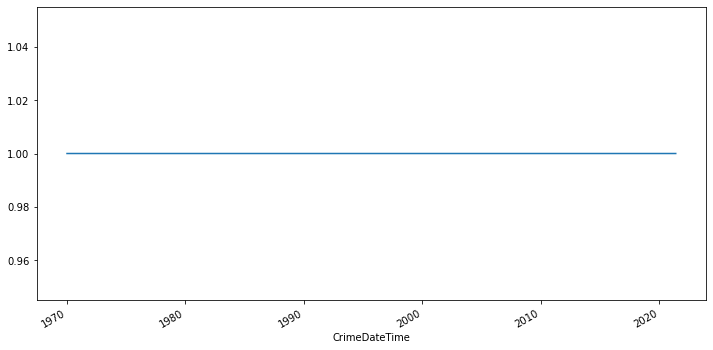

In [79]:
## Plot shooting
ts.plot()

> #### Q: What went wrong? What are we looking at?

## Resampling Time Series

In [81]:
## Resample to daily data
ts= ts.resample("D").sum()
ts

CrimeDateTime
1970-01-01 00:00:00+00:00    11
1970-01-02 00:00:00+00:00     0
1970-01-03 00:00:00+00:00     0
1970-01-04 00:00:00+00:00     0
1970-01-05 00:00:00+00:00     0
                             ..
2021-05-18 00:00:00+00:00     3
2021-05-19 00:00:00+00:00     0
2021-05-20 00:00:00+00:00     3
2021-05-21 00:00:00+00:00     2
2021-05-22 00:00:00+00:00     1
Freq: D, Name: SHOOTING, Length: 18770, dtype: int64

<AxesSubplot:xlabel='CrimeDateTime'>

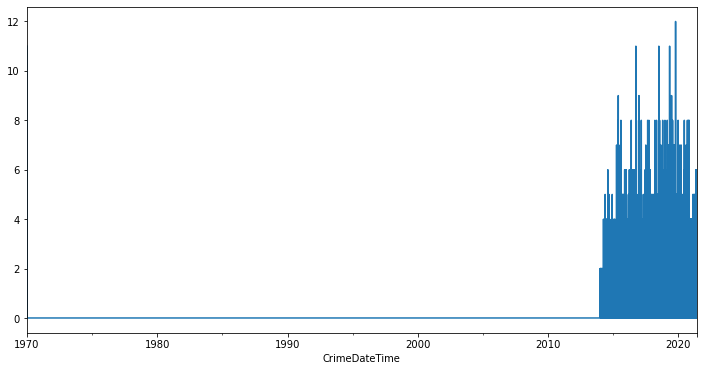

In [82]:
ts.plot()

<AxesSubplot:xlabel='CrimeDateTime'>

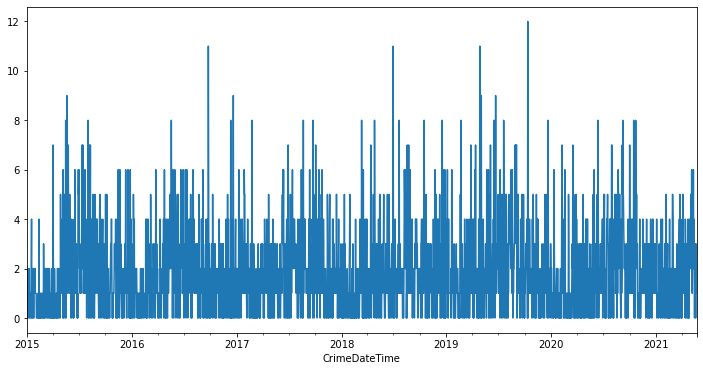

In [84]:
## Slice out dates prior to rise in daily counts
ts = ts.loc['2015':]
ts.plot()

### Time series Frequencies


#### Pandas Frequency Aliases

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases


|Alias	| Description|
| --- | --- |
|B |	business day frequency|
|C |	custom business day frequency|
|D |	calendar day frequency|
|W |	weekly frequency|
|M |	month end frequency|
|SM |	semi-month end frequency (15th and end of month)|
|BM |	business month end frequency|
|CBM |	custom business month end frequency|
|MS |	month start frequency|
|SMS |	semi-month start frequency (1st and 15th)|
|BMS |	business month start frequency|
|CBMS |	custom business month start frequency|
|Q |	quarter end frequency|
|BQ |	business quarter end frequency|
|QS |	quarter start frequency|
|BQS |	business quarter start frequency|
|A, Y |	year end frequency|
|BA, BY |	business year end frequency|
|AS, YS |	year start frequency|
|BAS, BYS |	business year start frequency|
|BH | business hour frequency|
|H | hourly frequency|
|T |  min	minutely frequency|
|S | secondly frequency|
|L |  ms	milliseconds|
|U |  us	microseconds|
|N | nanoseconds|

#### Compare Resampled ts

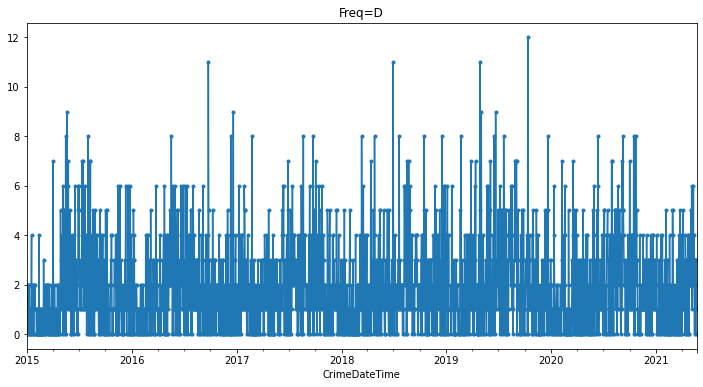

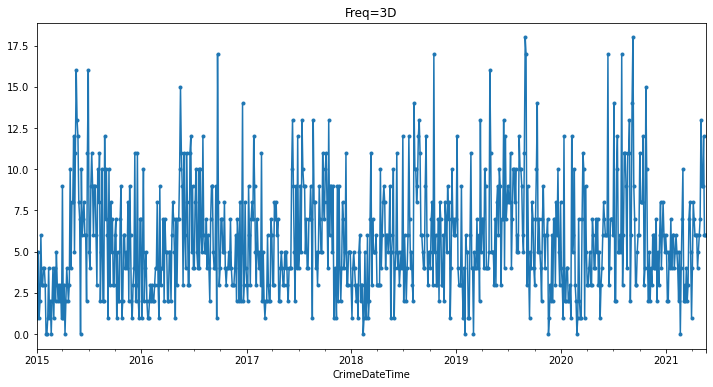

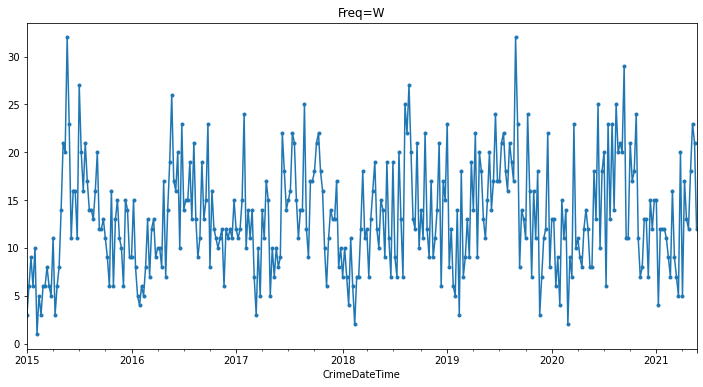

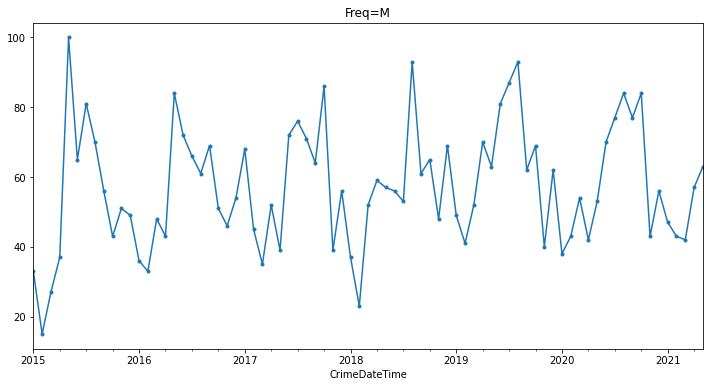

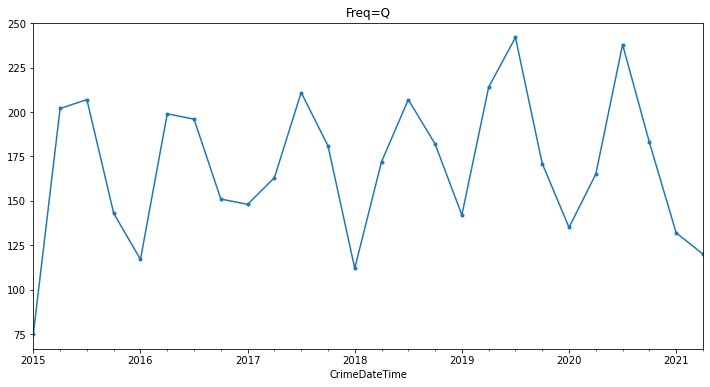

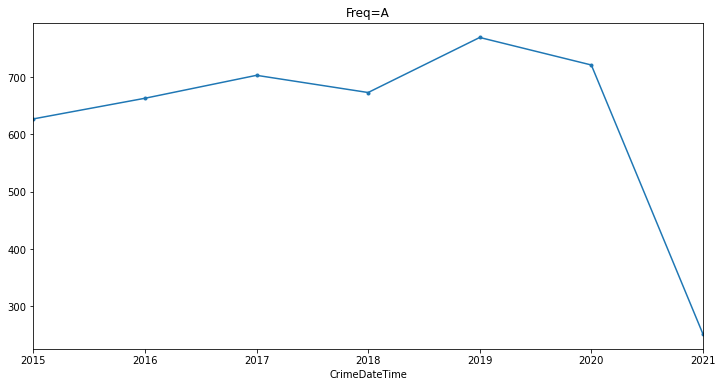

In [87]:
## Plot the same ts as different frequencies
## Specify freq codes
freq_codes = ['D','3D','W','M','Q','A']

## select ts from CRIMES
ts = CRIMES['SHOOTING'].loc['2015':]

## For each freq code, resample and plot
for freq in freq_codes:
    
    fig,ax = plt.subplots()
    ts.resample(freq).sum().plot(marker='.',title=f"Freq={freq}")


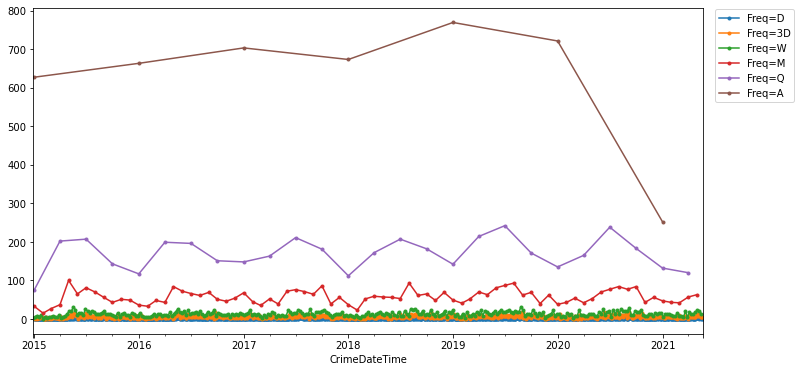

In [89]:
## Repeat the above loop,but plot it all on one figure
## Specify freq codes
freq_codes = ['D','3D','W','M','Q','A']

## select ts from CRIMES
ts = CRIMES['SHOOTING'].loc['2015':]
fig,ax = plt.subplots()

## For each freq code, resample and plot
for freq in freq_codes:
    
    ts.resample(freq).sum().plot(marker='.',label=f"Freq={freq}",ax=ax)
ax.legend(bbox_to_anchor=[1.01,1.01],loc='upper left')

## Visualize all CRIMES as "D" Freq

> **Loop through CRIMES and resample and plot all crimes**

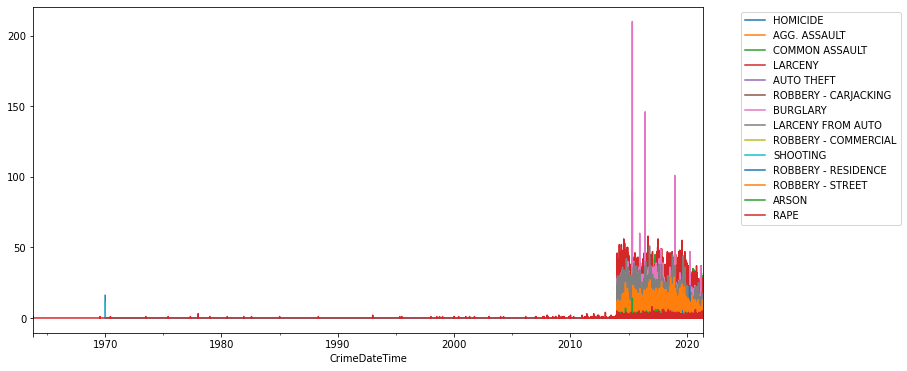

In [91]:
## Plot all crimes the same way
fig, ax = plt.subplots()
for crime,ts in CRIMES.items():
    
    ts.resample('D').sum().plot(label=crime)
    
ax.legend(bbox_to_anchor=[1.05,1.0])

## Slicing With Time Series

- Make sure you're index is sorted first'
- Feed in 2 dates as strings for slicing.
- Always use .loc when slicing dates

In [ ]:
## Slice 2014:
ts = CRIMES['SHOOTING']['SHOOTING'].resample('D').sum()
ts


In [ ]:
ts.loc["2014":]

### Using Dictionaries for TIme Series preprocessing

In [ ]:
## Save all crimes from 2014 on with freq=D in new TS dict
TS= {}
## For each crime
for crime,ts in CRIMES.items():
    
    ## Resample and slice and save ts
    TS[crime] = ts.sort_index().loc['2014':,crime].resample('D').sum()
TS.keys()

In [ ]:
## Check shooting
TS['SHOOTING']


### Visualize all ts with the differnet requency codes

In [ ]:
# ## Plot the same ts as different frequencies
# freq_codes = ['D','3D','W','M','Q']

# for freq in freq_codes:
#     fig, ax = plt.subplots()

#     for crime,ts in TS.items():
#         ts.loc['2015':'2019'].resample(freq).sum().plot(title=f"Freq Code = {freq}",ax=ax)
        
#     ax.legend(bbox_to_anchor=(1.05,1),loc='upper left')

### Save Final TS and `ts_df`

In [ ]:
# ## SAVE FINAL CHOICES FOR YEAR AND FREQUENCY TO TS 
# TS = {}

# ## Fill in each crimes's processed time series 
# for crime,ts in CRIMES.items():
    
#     ## Slice out years and resample and sum 
#     TS[crime] = ts.sort_index().loc['2014':][crime].resample('D').sum()
    
## Make TS into a df
ts_df = pd.concat(TS,axis=1)
ts_df.head()

In [ ]:
TS['BURGLARY']

In [ ]:
## Check For Null Values
ts_df.isna().sum()

In [ ]:
## Show rows with null values
ts_df[ts_df.isna().sum(axis=1) > 0]

> More columns would benefit from ffill than bfill so we are going to ffill and then dropna to remove the few days at the beginning of 2014 without data

In [ ]:
## FFill null values
ts_df.bfill(inplace=True)
ts_df.ffill(inplace=True)

## chekc for nulls
ts_df[ts_df.isna().sum(axis=1) > 0]

In [ ]:
## Drop remaining nulls
ts_df.dropna(inplace=True)
ts_df.isna().sum()

In [ ]:
## Final null check


In [ ]:
## Save df to csv for time series modeling next class
ts_df.to_csv('baltimore_crime_2020_ts_070620ft.csv')

# Time Series Trends

In [ ]:
ts = ts_df['SHOOTING'].resample('D').sum().loc['2018':'2019']
ts.plot()

### Types of Trends

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-removing-trends-online-ds-ft-100719/master/images/new_trendseasonal.png" width=80%>

### Stationarity

<div style="text-align:center;font-size:2em">Mean</div>
    
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-types-of-trends-online-ds-ft-100719/master/images/new_mean_nonstationary.png" width=70%>
<br><br>
<div style="text-align:center;font-size:3em">Variance</div>
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-types-of-trends-online-ds-ft-100719/master/images/new_cov_nonstationary.png" width=70%>
</div>

In [ ]:
## Lab Function
from statsmodels.tsa.stattools import adfuller

def stationarity_check(TS,plot=True,col=None):
    """From: https://learn.co/tracks/data-science-career-v2/module-4-a-complete-data-science-project-using-multiple-regression/working-with-time-series-data/time-series-decomposition
    """
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller

    if col is not None:
        # Perform the Dickey Fuller Test
        dftest = adfuller(TS[col]) # change the passengers column as required 
    else:
        dftest=adfuller(TS)
 
    if plot:
        # Calculate rolling statistics
        rolmean = TS.rolling(window = 8, center = False).mean()
        rolstd = TS.rolling(window = 8, center = False).std()

        #Plot rolling statistics:
        fig = plt.figure(figsize=(12,6))
        orig = plt.plot(TS, color='blue',label='Original')
        mean = plt.plot(rolmean, color='red', label='Rolling Mean')
        std = plt.plot(rolstd, color='black', label = 'Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')
#     plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
    dfoutput['sig'] = dfoutput['p-value']<.05
    display (dfoutput.round(3))
    
    return dfoutput
#     return dftest

In [ ]:
# 

In [ ]:
ts.plot()

In [ ]:
# adfuller()
ts =ts.resample('D').sum()

In [ ]:
res = stationarity_check(ts);

# Removing Trends (cont'd next class)

- .diff()
- subtract rolling mean
- seasonal decomposition

## Seasonal Decomposition

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(ts)#.plot();
decomp.plot();

In [ ]:
decomp.resid

In [ ]:
decomp.seasonal

In [ ]:
 stationarity_check(decomp.seasonal);

# APPENDIX

In [ ]:
ax = ts_df.loc['2017':,'BURGLARY'].plot()
ax.legend(bbox_to_anchor=(1.05,1),loc='upper left')
ax.set(ylabel='# of Crimes',xlabel='Year by Day')

## Time Series Calculations


### Rolling Statistics

In [ ]:
ts_df.index

In [ ]:
## Plot the same ts as different frequencies
# freq_codes = ['D','3D','W','M','Q']
windows = [3,5,7,30,90]
for window in windows:
    
    fig,ax = plt.subplots()
    ts_df.rolling(window).mean().plot(title= f"Window = {window}",ax=ax)
#     ts.rolling(window).mean().plot(title=title)
        
    ax.legend(bbox_to_anchor=(1.05,1),loc='upper left')

## Doing it all Together

In [ ]:
# pd.get_dummies(df_orig,columns=['Description'])

In [ ]:
df = df_orig.copy()
for crime in df['Description'].unique():
    df[crime] = (df['Description']==crime).astype(int)
df

In [ ]:
df.sort_index().loc['2014':].resample('D').sum()

## Older cont


In [ ]:
ts = TS['HOMICIDE']
ts

In [ ]:
ts = ts.resample('W').sum()
ts

In [ ]:
ts_mean = ts.rolling(window=2).sum()
ax = ts.plot(label='Time Series')
ts_mean.plot(label='Rolling 7-Day Average')
ax.legend()

In [ ]:
## fill in null values
# ts.plot()
ts.ewm(halflife=2).mean()#sum()#.plot()

In [ ]:
## Use adfull to test for stationarity
ts.plot()

## Rolling Windows 

In [ ]:
ts_df.rolling(1).mean()

In [ ]:
# ts_df.rolling(7).mean().plot()

## Using Datetime objects and apply statemements

In [ ]:
df_ = CRIMES['HOMICIDE'].reset_index().dropna()
display(df_.head())
df_.dtypes

In [ ]:
df_['index'][0]

In [ ]:
df_['index'].dt.year#.strftime('%y')

In [ ]:
df_.isna().sum()

In [ ]:
df_['index'].dt.year

In [ ]:
df_['index'].map(lambda x: x.strftime('%Y'))

In [ ]:
test = df_.loc[0,'index']
test

In [ ]:
test.strftime('%y')

### Date Str Formatting




Formatting follows the Python datetime <strong><a href='http://strftime.org/'>strftime</a></strong> codes.<br>
The following examples are based on <tt>datetime.datetime(2001, 2, 3, 16, 5, 6)</tt>:
<br><br>

<table style="display: inline-block">  
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%Y</td><td>Year with century as a decimal number.</td><td>2001</td></tr>
<tr><td>%y</td><td>Year without century as a zero-padded decimal number.</td><td>01</td></tr>
<tr><td>%m</td><td>Month as a zero-padded decimal number.</td><td>02</td></tr>
<tr><td>%B</td><td>Month as locale’s full name.</td><td>February</td></tr>
<tr><td>%b</td><td>Month as locale’s abbreviated name.</td><td>Feb</td></tr>
<tr><td>%d</td><td>Day of the month as a zero-padded decimal number.</td><td>03</td></tr>  
<tr><td>%A</td><td>Weekday as locale’s full name.</td><td>Saturday</td></tr>
<tr><td>%a</td><td>Weekday as locale’s abbreviated name.</td><td>Sat</td></tr>
<tr><td>%H</td><td>Hour (24-hour clock) as a zero-padded decimal number.</td><td>16</td></tr>
<tr><td>%I</td><td>Hour (12-hour clock) as a zero-padded decimal number.</td><td>04</td></tr>
<tr><td>%p</td><td>Locale’s equivalent of either AM or PM.</td><td>PM</td></tr>
<tr><td>%M</td><td>Minute as a zero-padded decimal number.</td><td>05</td></tr>
<tr><td>%S</td><td>Second as a zero-padded decimal number.</td><td>06</td></tr>
</table>
<table style="display: inline-block">
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%#m</td><td>Month as a decimal number. (Windows)</td><td>2</td></tr>
<tr><td>%-m</td><td>Month as a decimal number. (Mac/Linux)</td><td>2</td></tr>
<tr><td>%#x</td><td>Long date</td><td>Saturday, February 03, 2001</td></tr>
<tr><td>%#c</td><td>Long date and time</td><td>Saturday, February 03, 2001 16:05:06</td></tr>
</table>  
    

In [ ]:
test = ts.index[0]
print(test)
test


In [ ]:
print(test.strftime("%m-%d-%Y"))
print(test.strftime("%T"))

In [ ]:
TS['SHOOTING']

## A: Groupby Indexing

In [ ]:
ts.groupby(pd.Grouper(freq='M')).sum().plot(subplots=True)